## Importando

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv')

## Entendendo as colunas e seus valores

In [3]:
print(train.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Variable / Definition / Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q


In [5]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass
- Continous: Age, Fare
- Discrete: SibSp, Parch

In [6]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,958,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
113,1005,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36.0,0,2,C.A. 37671,15.9000,NaN,S
242,1134,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,E34,C
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q


test não possui 'survived'

## Coletando informacoes sobre sobreviventes

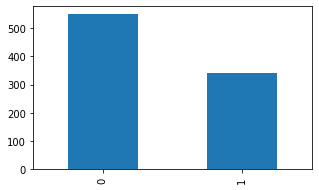

In [7]:
plt.figure(figsize=(5,3))
train['Survived'].value_counts().plot(kind='bar')

In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
sum = train['Survived'].count()
print("survived {:.2f}%".format(342/sum))
print("not survived {:.2f}%".format(549/sum))

survived 0.38%
not survived 0.62%


In [10]:
for feature in ['Sex', 'Pclass', 'SibSp', 'Parch']:
    temp = train[[feature, 'Survived']].groupby([feature], as_index=False).sum().sort_values(by='Survived')
    print(temp)
    print('\n')

      Sex  Survived
1    male       109
0  female       233


   Pclass  Survived
1       2        87
2       3       119
0       1       136


   SibSp  Survived
5      5         0
6      8         0
4      4         3
3      3         4
2      2        13
1      1       112
0      0       210


   Parch  Survived
4      4         0
6      6         0
5      5         1
3      3         3
2      2        40
1      1        65
0      0       233




Com uma analise inicial podemos ver que a maioria dos sobreviventes é do sexo feminino, assim como na otica das classes socio-economicas, quanto maior a classe, mais sobreviventes. 

## Correlacoes

In [11]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

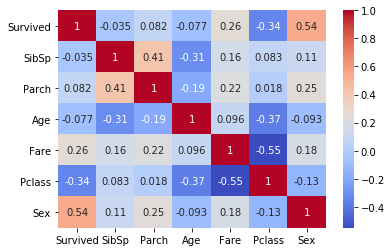

In [12]:
# Correlacoes entre features
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare", "Pclass", "Sex"]].corr(), annot=True, cmap = "coolwarm")

A maior correlacao positiva com survived é da feature Sex e depois Fare

Excluindo survived, parece existir uma correlacao grande entre SibSp e Parch, o que faz sentido já que as duas features falam sobre parentescos 

Também parece existir uma correlacao negativa alta entre Fare e Pclass.

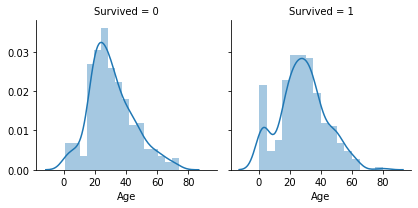

In [13]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(sns.distplot, "Age")

[]

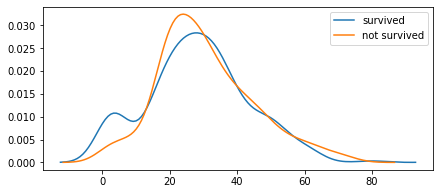

In [14]:
plt.figure(figsize=(7,3))
sns.kdeplot(train[train.Survived == 1].Age, label="survived")
sns.kdeplot(train[train.Survived == 0].Age, label="not survived")
plt.plot()

Não é possível concluir muito sobre a idade.

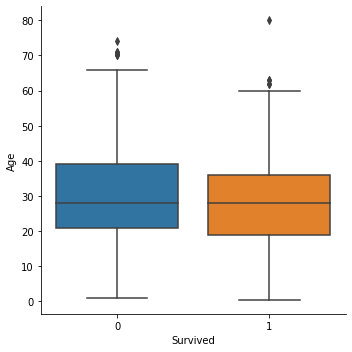

In [15]:
sns.catplot(x="Survived", y="Age", data=train, kind="box")

A mediana é a mesma

## Verificando valores nulos

In [16]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64